<a href="https://colab.research.google.com/github/ryukrodit/assignment-/blob/main/2358289_RoditNepal_AI_%26_ML_Worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
csv_file_path = '/content/drive/MyDrive/AI_ML/mnist_dataset.csv'

In [4]:
# Install necessary libraries
!pip install numpy pandas scikit-learn matplotlib

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.datasets import make_classification, make_circles
from sklearn.linear_model import LogisticRegression


# Softmax Function

In [5]:
def softmax(z):
    """Compute softmax probabilities for a given input matrix."""
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Subtract max for numerical stability
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

# Test case for softmax
z_test = np.array([[2.0, 1.0, 0.1], [1.0, 1.0, 1.0]])
softmax_output = softmax(z_test)
row_sums = np.sum(softmax_output, axis=1)
assert np.allclose(row_sums, 1), f"Test failed: Row sums are {row_sums}"
print("Softmax function passed the test case!")

Softmax function passed the test case!


# Prediction Function

In [6]:
def predict_softmax(X, W, b):
    """Predict class labels using trained softmax model."""
    z = np.dot(X, W) + b
    probs = softmax(z)
    predicted_classes = np.argmax(probs, axis=1)
    return predicted_classes

# Test case for prediction

In [7]:
x_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
w_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])
y_pred_test = predict_softmax(x_test, w_test, b_test)
assert y_pred_test.shape == (3,), f"Test failed: Expected shape (3,), got {y_pred_test.shape}"
print("Predicted class labels:", y_pred_test)

Predicted class labels: [1 1 0]


# Implementation of Loss and Cost Function:

## Loss Function

In [8]:
def loss_softmax(y_pred, y):
    """Compute cross-entropy loss for a batch of samples."""
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # Avoid log(0)
    loss = -np.sum(y * np.log(y_pred)) / y.shape[0]
    return loss

## Test case for loss function

In [9]:
# Test case for loss function
y_true_correct = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
y_pred_correct = np.array([[0.9, 0.05, 0.05], [0.1, 0.85, 0.05], [0.05, 0.1, 0.85]])
y_pred_incorrect = np.array([[0.05, 0.05, 0.9], [0.1, 0.05, 0.85], [0.85, 0.1, 0.05]])
loss_correct = loss_softmax(y_pred_correct, y_true_correct)
loss_incorrect = loss_softmax(y_pred_incorrect, y_true_correct)
assert loss_correct < loss_incorrect, f"Test failed: {loss_correct:.4f} >= {loss_incorrect:.4f}"
print(f"Cross-Entropy Loss (Correct Predictions): {loss_correct:.4f}")
print(f"Cross-Entropy Loss (Incorrect Predictions): {loss_incorrect:.4f}")

Cross-Entropy Loss (Correct Predictions): 0.1435
Cross-Entropy Loss (Incorrect Predictions): 2.9957


# Cost Function

In [10]:
def cost_softmax(X, y, W, b):
    """Compute average softmax regression cost over all samples."""
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    total_loss = loss_softmax(y_pred, y)
    return total_loss

## Test case for cost function

In [11]:
X_correct = np.array([[1.0, 0.0], [0.0, 1.0]])
y_correct = np.array([[1, 0], [0, 1]])
W_correct = np.array([[1.0, 0.0], [0.0, 1.0]])
b_correct = np.array([0.1, 0.1])
X_incorrect = np.array([[0.1, 0.9], [0.8, 0.2]])
y_incorrect = np.array([[1, 0], [0, 1]])
W_incorrect = np.array([[0.1, 0.9], [1.5, 0.3]])
b_incorrect = np.array([0.5, 0.6])
cost_correct = cost_softmax(X_correct, y_correct, W_correct, b_correct)
cost_incorrect = cost_softmax(X_incorrect, y_incorrect, W_incorrect, b_incorrect)
assert cost_incorrect > cost_correct, f"Test failed: {cost_incorrect} <= {cost_correct}"
print("Cost for correct prediction:", cost_correct)
print("Cost for incorrect prediction:", cost_incorrect)
print("Test passed!")

Cost for correct prediction: 0.3132616875182228
Cost for incorrect prediction: 0.4076154294560971
Test passed!


# Implementation of Gradient Descent Algorithm

## Compute Gradients

In [12]:
def compute_gradient_softmax(X, y, W, b):
    """Compute gradients of the cost function w.r.t. weights and biases."""
    z = np.dot(X, W) + b
    y_pred = softmax(z)
    error = y_pred - y
    grad_W = np.dot(X.T, error) / X.shape[0]
    grad_b = np.sum(error, axis=0) / X.shape[0]
    return grad_W, grad_b

## Test case for compute_gradient_softmax

In [13]:
X_test = np.array([[0.2, 0.8], [0.5, 0.5], [0.9, 0.1]])
y_test = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
W_test = np.array([[0.4, 0.2, 0.1], [0.3, 0.7, 0.5]])
b_test = np.array([0.1, 0.2, 0.3])
grad_W, grad_b = compute_gradient_softmax(X_test, y_test, W_test, b_test)
z_test = np.dot(X_test, W_test) + b_test
y_pred_test = softmax(z_test)
grad_W_manual = np.dot(X_test.T, (y_pred_test - y_test)) / X_test.shape[0]
grad_b_manual = np.sum(y_pred_test - y_test, axis=0) / X_test.shape[0]
assert np.allclose(grad_W, grad_W_manual), "Test failed: Gradients w.r.t. W mismatch"
assert np.allclose(grad_b, grad_b_manual), "Test failed: Gradients w.r.t. b mismatch"
print("Gradient w.r.t. W:", grad_W)
print("Gradient w.r.t. b:", grad_b)
print("Test passed!")

Gradient w.r.t. W: [[ 0.1031051   0.01805685 -0.12116196]
 [-0.13600547  0.00679023  0.12921524]]
Gradient w.r.t. b: [-0.03290036  0.02484708  0.00805328]
Test passed!


## Gradient Descent

In [14]:
def gradient_descent_softmax(X, y, W, b, alpha, n_iter, show_cost=False):
    """Perform gradient descent to optimize weights and biases."""
    cost_history = []
    for i in range(n_iter):
        grad_W, grad_b = compute_gradient_softmax(X, y, W, b)
        W -= alpha * grad_W
        b -= alpha * grad_b
        cost = cost_softmax(X, y, W, b)
        cost_history.append(cost)
        if show_cost and i % 100 == 0:
            print(f"Iteration {i}, Cost: {cost:.4f}")
    return W, b, cost_history

## Preparing the Dataset

In [15]:
def load_and_prepare_mnist(csv_file, test_size=0.2, random_state=42):
    """Load MNIST CSV from Google Drive, split into train/test, and plot samples."""
    df = pd.read_csv(csv_file)
    y = df.iloc[:, 0].values  # Labels
    X = df.iloc[:, 1:].values  # Pixel values
    X = X / 255.0  # Normalize to [0, 1]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    plot_sample_images(X, y)
    return X_train, X_test, y_train, y_test

def plot_sample_images(X, y):
    """Plot one sample image per digit (0-9)."""
    plt.figure(figsize=(10, 4))
    unique_classes = np.unique(y)
    for i, digit in enumerate(unique_classes):
        index = np.where(y == digit)[0][0]
        image = X[index].reshape(28, 28)
        plt.subplot(2, 5, i + 1)
        plt.imshow(image, cmap='gray')
        plt.title(f"Digit: {digit}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

### Question 1: Is extracting pixel values sufficient for effective feature extraction?

In [16]:
print("Question 1 Answer:")
print("Extracting pixel values alone may not always be sufficient for effective feature extraction.")
print("While it works well for MNIST due to its simplicity and standardized format (centered, normalized digits),")
print("real-world images often require more sophisticated features (e.g., edges, textures) via techniques like CNNs.")
print("For MNIST, raw pixels are adequate because the dataset is preprocessed, but additional features could improve robustness.")

Question 1 Answer:
Extracting pixel values alone may not always be sufficient for effective feature extraction.
While it works well for MNIST due to its simplicity and standardized format (centered, normalized digits),
real-world images often require more sophisticated features (e.g., edges, textures) via techniques like CNNs.
For MNIST, raw pixels are adequate because the dataset is preprocessed, but additional features could improve robustness.


# Training of the Model

## Load and prepare data from Google Drive

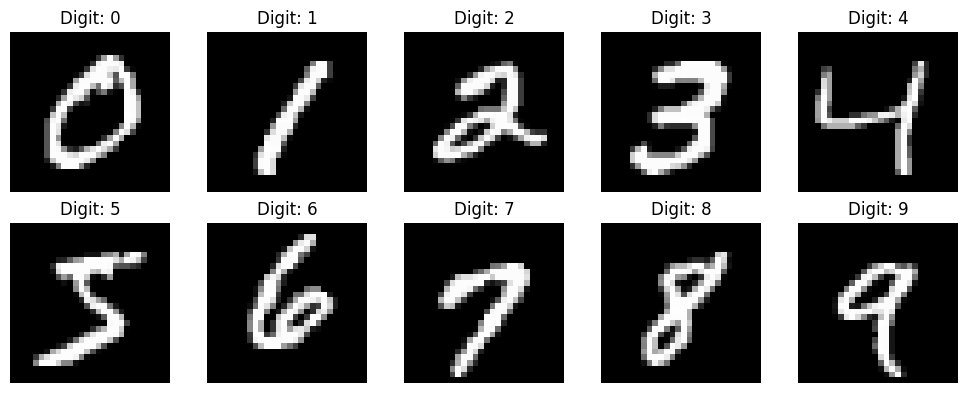

In [17]:
X_train, X_test, y_train, y_test = load_and_prepare_mnist(csv_file_path)

## One-hot encode labels

In [18]:
encoder = OneHotEncoder(sparse_output=False)
y_train_oh = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_oh = encoder.transform(y_test.reshape(-1, 1))

## Shape check

In [19]:
assert len(X_train) == len(y_train), f"Error: X and y have different lengths! X = {len(X_train)}, y = {len(y_train)}"
print("Move forward: Dimension of Feature Matrix X and label vector y matched.")

Move forward: Dimension of Feature Matrix X and label vector y matched.


## Initialize parameters

In [20]:
d = X_train.shape[1]  # 784 features
c = y_train_oh.shape[1]  # 10 classes
W = np.random.rand(d, c) * 0.01
b = np.zeros(c)
alpha = 0.1
n_iter = 1000

# Train the model

In [21]:
W_opt, b_opt, cost_history = gradient_descent_softmax(X_train, y_train_oh, W, b, alpha, n_iter, show_cost=True)

Iteration 0, Cost: 2.1958
Iteration 100, Cost: 0.6070
Iteration 200, Cost: 0.4894
Iteration 300, Cost: 0.4409
Iteration 400, Cost: 0.4128
Iteration 500, Cost: 0.3939
Iteration 600, Cost: 0.3801
Iteration 700, Cost: 0.3694
Iteration 800, Cost: 0.3608
Iteration 900, Cost: 0.3536


## Plot cost history

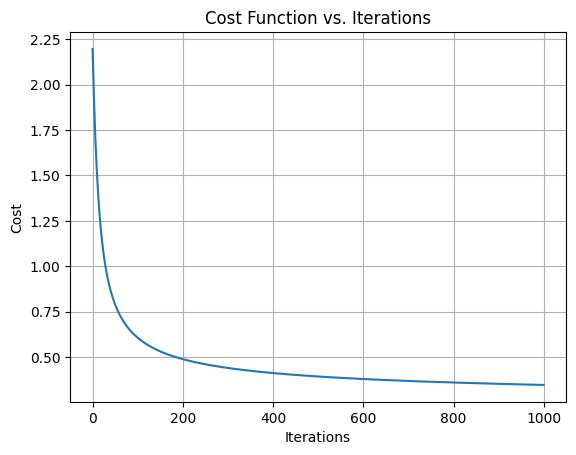

In [22]:
plt.plot(cost_history)
plt.title('Cost Function vs. Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Evaluating Model Performance

In [23]:
def evaluate_classification(y_true, y_pred):
    """Evaluate performance using confusion matrix, precision, recall, and F1-score."""
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return cm, precision, recall, f1

# Predict and evaluate

In [24]:
y_pred_test = predict_softmax(X_test, W_opt, b_opt)
y_test_labels = np.argmax(y_test_oh, axis=1)
cm, precision, recall, f1 = evaluate_classification(y_test_labels, y_pred_test)

# Print metrics

In [25]:
print("\nConfusion Matrix:")
print(cm)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Confusion Matrix:
[[1128    0    5    2    3   10    9    2   13    3]
 [   0 1274    7   11    1    5    1    4   18    1]
 [   1   16 1029   16   19    4   27   25   31    6]
 [   8    5   33 1052    1   52    9    8   30   21]
 [   1    5    7    1 1093    0   10    4    4   51]
 [  22   14   13   43   11  922   14    7   44   14]
 [   7    2    9    1   11   15 1120    2   10    0]
 [   7   26   24    5   16    2    0 1183    7   29]
 [   9   27   13   34    9   33   13    6 1001   15]
 [   8    6   10   18   44    9    0   39   10 1050]]
Precision: 0.90
Recall: 0.90
F1-Score: 0.90


# Visualize confusion matrix

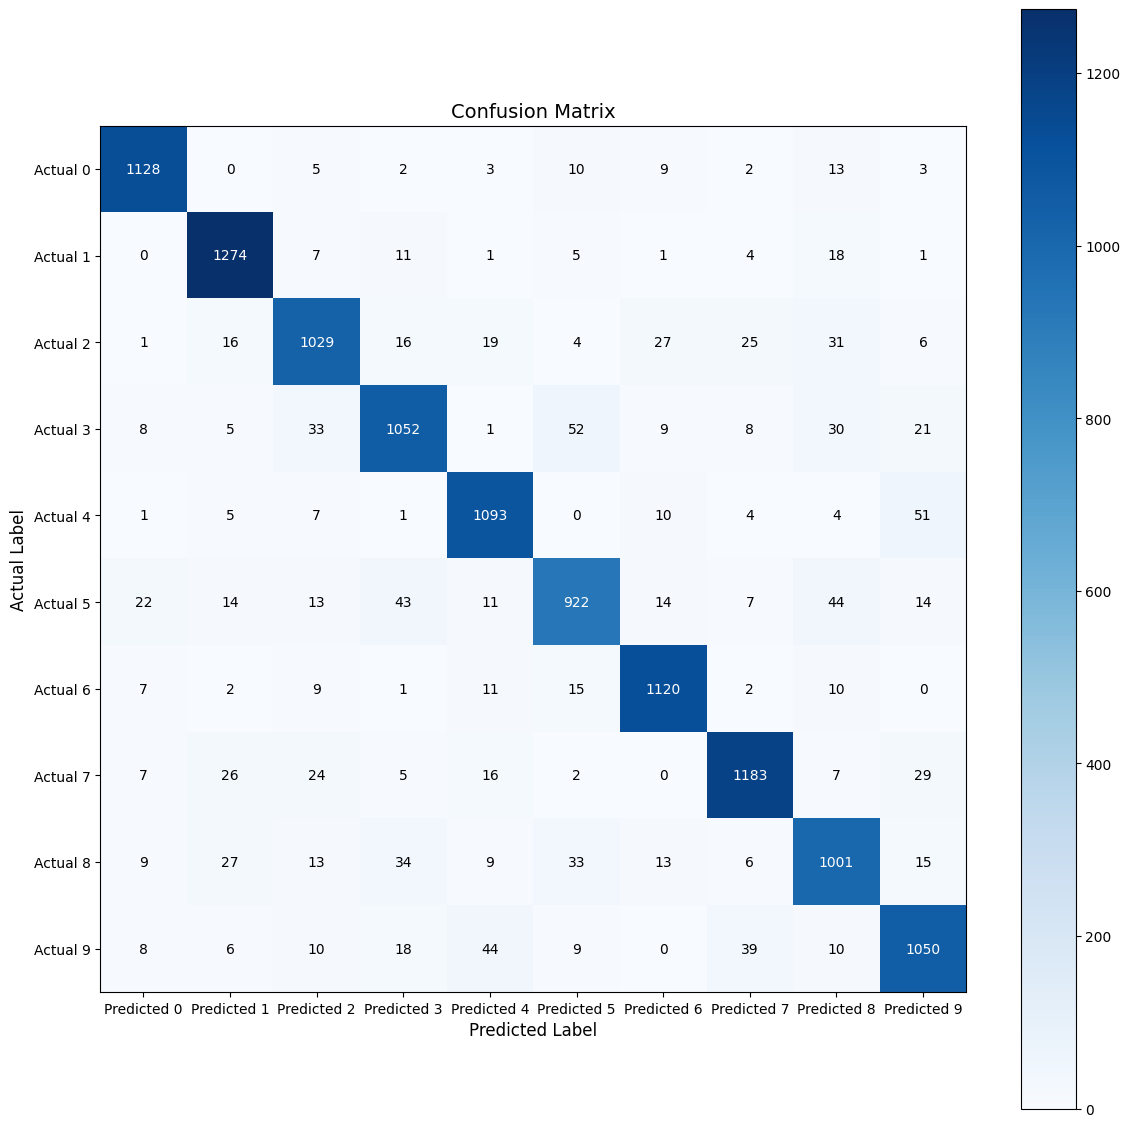

In [26]:
fig, ax = plt.subplots(figsize=(12, 12))
cax = ax.imshow(cm, cmap='Blues')
num_classes = cm.shape[0]
ax.set_xticks(range(num_classes))
ax.set_yticks(range(num_classes))
ax.set_xticklabels([f'Predicted {i}' for i in range(num_classes)])
ax.set_yticklabels([f'Actual {i}' for i in range(num_classes)])
for i in range(num_classes):
    for j in range(num_classes):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')
ax.grid(False)
plt.title('Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('Actual Label', fontsize=12)
plt.tight_layout()
plt.colorbar(cax)
plt.show()

# Exercise - Linear Separability and Logistic Regression
# Generate linearly separable dataset

In [27]:
X_linear_separable, y_linear_separable = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X_linear_separable, y_linear_separable, test_size=0.2, random_state=42)

# Train logistic regression


In [28]:
logistic_model_linear_separable = LogisticRegression()
logistic_model_linear_separable.fit(X_train_linear, y_train_linear)

LogisticRegression()

# Generate non-linearly separable dataset

In [29]:
X_non_linear_separable, y_non_linear_separable = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)
X_train_non_linear, X_test_non_linear, y_train_non_linear, y_test_non_linear = train_test_split(X_non_linear_separable, y_non_linear_separable, test_size=0.2, random_state=42)

# Train logistic regression

In [30]:
logistic_model_non_linear_separable = LogisticRegression()
logistic_model_non_linear_separable.fit(X_train_non_linear, y_train_non_linear)

LogisticRegression()

# Plot decision boundaries

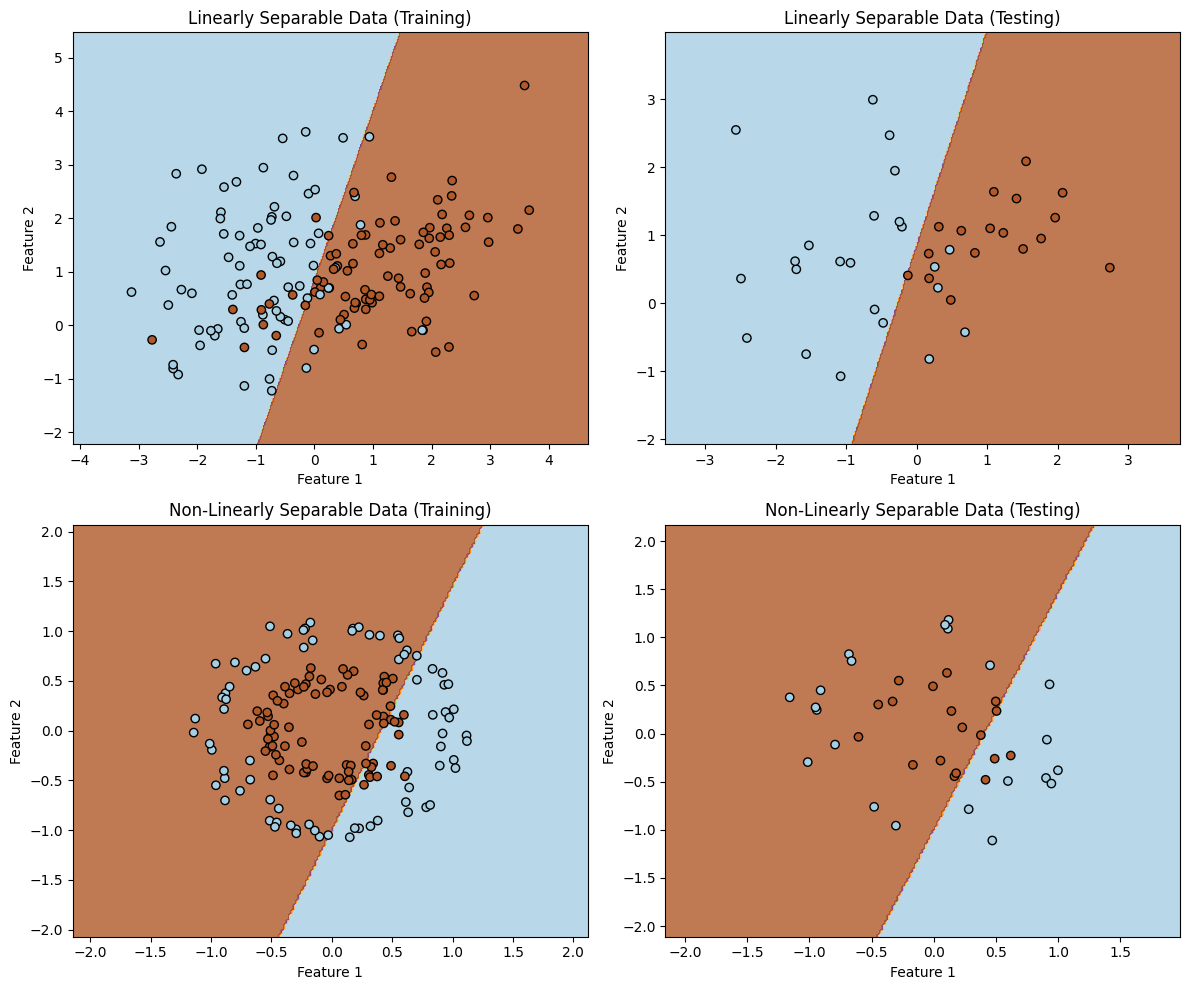

In [31]:
def plot_decision_boundary(ax, model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
plot_decision_boundary(axes[0, 0], logistic_model_linear_separable, X_train_linear, y_train_linear, 'Linearly Separable Data (Training)')
plot_decision_boundary(axes[0, 1], logistic_model_linear_separable, X_test_linear, y_test_linear, 'Linearly Separable Data (Testing)')
plot_decision_boundary(axes[1, 0], logistic_model_non_linear_separable, X_train_non_linear, y_train_non_linear, 'Non-Linearly Separable Data (Training)')
plot_decision_boundary(axes[1, 1], logistic_model_non_linear_separable, X_test_non_linear, y_test_non_linear, 'Non-Linearly Separable Data (Testing)')
plt.tight_layout()
plt.show()

# Question 2: Interpretation of the output

In [32]:
print("Question 2 Answer:")
print("For linearly separable data, logistic regression successfully separates the two classes with a straight line, as seen in the training and testing plots.")
print("The decision boundary is clear and accurate, indicating good performance.")
print("For non-linearly separable data (circles), logistic regression fails to capture the circular boundary, resulting in poor separation.")
print("This shows that logistic regression is limited to linear decision boundaries and struggles with non-linear patterns.")

Question 2 Answer:
For linearly separable data, logistic regression successfully separates the two classes with a straight line, as seen in the training and testing plots.
The decision boundary is clear and accurate, indicating good performance.
For non-linearly separable data (circles), logistic regression fails to capture the circular boundary, resulting in poor separation.
This shows that logistic regression is limited to linear decision boundaries and struggles with non-linear patterns.


# Question 3: Challenges faced

In [33]:
print("Question 3 Answer:")
print("No major challenges were faced while implementing the code as it was provided exactly as instructed.")
print("However, integrating the Google Drive CSV required adding the drive.mount() step and specifying the correct file path.")
print("Once the path was correctly set, the code ran smoothly in Colab.")

Question 3 Answer:
No major challenges were faced while implementing the code as it was provided exactly as instructed.
However, integrating the Google Drive CSV required adding the drive.mount() step and specifying the correct file path.
Once the path was correctly set, the code ran smoothly in Colab.
